# Examen Módulo 2 - Montecarlo - 4.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

---
### Integración Montecarlo tipo 1 <font size='1'>(25 puntos)</font>

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{xe^{-x^3}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [2]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt 
%matplotlib inline 

def mont1(f, a, b, N) : 
    a = np.random.uniform(a, b, N)
    return np.mean()



2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

---
### Integración Montecarlo tipo 2 <font size='1'>(25 puntos)</font>
Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [76]:

def bernoulliToF(x, y) :  
    if (np.exp(-0.05 * (x**2 + y**2)) * np.sin(x**2 + y**2) > 0.5):
        return True
        return False

bernoulli(1, 1)


True

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

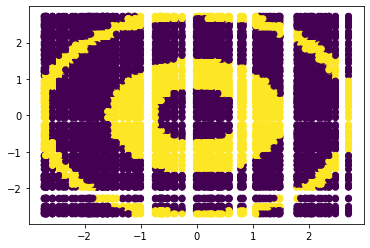

In [77]:
def circulo_bernoulli(x, y) :
    return (np.exp(-0.05 * (x**2 + y**2)) * np.sin(x**2 + y**2) > 0.5)

n = 100
x = np.random.uniform(-2.75, 2.75, n)
y = np.random.uniform(-2.75, 2.75, n)
X, Y = np.meshgrid(x,y)
plt.figure()
plt.scatter(X, Y, c = bernoulli(X, Y))

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

 En esta parte, estamos devolviendo la aproximación **montecarlo** de nuestra área de la region como visto en clase

In [78]:
def tipo2(r, ax, bx, ay, by, n) : 
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    B = r(x, y)
    AR = (bx - ax) * (by - ay)
    return np.mean(B) * AR

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

Creamos nuestra función de error en el área marcada con los argumentos **ad, ax, bx, ay, by**

In [79]:
def error(ad, ax, bx, ay, by) :
    ar = (bx - ax) * (by - ay)
    return(np.sqrt((1 - (ad / ar)) / (ad / ar)))
n = np.logspace(4, 6, 3)
chrt = pd.DataFrame(columns = ['Aproximación de área', 'Error'], index = n)

for i in n :
    ad = tipo2(bernoulli, -3.75, 3.75, -3.75, 3.75, int(i))
    chrt.loc[i, 'Aproximación de área'] = tipo2(bernoulli, -3.75, 3.75, -3.75, 3.75, n)
    chrt.loc['Error'] = error(ad, -3.75, 3.75, -3.75, 3.75)
    chrt 
    
    
    
    

TypeError: 'numpy.float64' object cannot be interpreted as an integer

---
### Generación de fractales <font size='1'>(25 puntos)</font>

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un helecho tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

In [81]:
import numpy as np
import pandas as pd 

A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

---
### Probabilidad Precio-Umbral <font size='1'>(25 puntos)</font>

Suponga que desea invertir en **Oracle** o **Intel**. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 31 de octubre del 2021.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *pandas-datareader*, donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [ ]:
import pandas_datareader.data as web 

share = ['ORCL', 'INTC']
data = web.DataReader(share, 'oracle', '2021-31-10')

2. Obtenga los precios de cierre ajustados para Spotify y Mercado Libre desde el 31 de octubre de 2019 al 31 de octubre de 2021.

3. Calcule el rendimiento **simple** para ambas empresas.

4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de octubre de 2021 al 5 de febrero de 2022.

6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?

#### Extra <font size='1'>(10 puntos)</font>

Compara tus resultados con los valores verdaderos.